In [ ]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

In [ ]:
!pip install opencv-python

In [10]:
!pip install labelme

  Using cached labelme-5.1.1.tar.gz (1.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached imgviz-1.6.2-py3-none-any.whl
  Using cached natsort-8.2.0-py3-none-any.whl (37 kB)
  Using cached termcolor-2.1.1-py3-none-any.whl (6.2 kB)
  Created wheel for labelme: filename=labelme-5.1.1-py3-none-any.whl size=1466349 sha256=777b88058995aeddfa7a839a015abb266839f4353a2e6a4b2bc378e5255a4247
  Stored in directory: c:\users\dhivy\appdata\local\pip\cache\wheels\f7\dd\4b\aa34a2cc4e9a53f43b682ee3e74ab03e877f37cc36c67ea099
Successfully built labelme


In [1]:
import os
import time
import uuid
import cv2

In [27]:
IMAGES_PATH = os.path.join("data", "images")
number_images = 30

In [28]:
vid = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = vid.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
vid.release()
cv2.destroyAllWindows()

In [61]:
!labelme

^C


In [2]:
import numpy as np
import tensorflow as tf
import json
from matplotlib import pyplot as plt

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [6]:
images.as_numpy_iterator().next()

b'data\\images\\f48936ea-7064-11ed-90d1-00155dc7c39b.jpg'

In [7]:
def load_image(img): 
    byte_image = tf.io.read_file(img)
    image = tf.io.decode_jpeg(byte_image)
    return image

In [8]:
images = images.map(load_image)

In [9]:
images.as_numpy_iterator().next()

array([[[ 5,  7,  6],
        [ 5,  7,  6],
        [ 5,  7,  6],
        ...,
        [ 7,  6,  2],
        [10,  6,  3],
        [10,  6,  3]],

       [[ 4,  6,  5],
        [ 4,  6,  5],
        [ 5,  7,  6],
        ...,
        [ 8,  7,  3],
        [10,  6,  3],
        [10,  6,  3]],

       [[ 4,  6,  3],
        [ 4,  6,  3],
        [ 4,  6,  3],
        ...,
        [ 7,  6,  2],
        [ 7,  6,  2],
        [ 7,  6,  2]],

       ...,

       [[ 1,  6,  2],
        [ 2,  7,  3],
        [ 2,  7,  3],
        ...,
        [ 2,  7,  1],
        [ 2,  7,  1],
        [ 2,  7,  1]],

       [[ 1,  6,  2],
        [ 2,  7,  3],
        [ 2,  7,  3],
        ...,
        [ 3,  8,  2],
        [ 3,  8,  2],
        [ 3,  8,  2]],

       [[ 1,  6,  2],
        [ 2,  7,  3],
        [ 2,  7,  3],
        ...,
        [ 4,  9,  3],
        [ 4,  9,  3],
        [ 4,  9,  3]]], dtype=uint8)

In [10]:
image_generator = images.batch(4).as_numpy_iterator()

In [11]:
plot_images = image_generator.next()

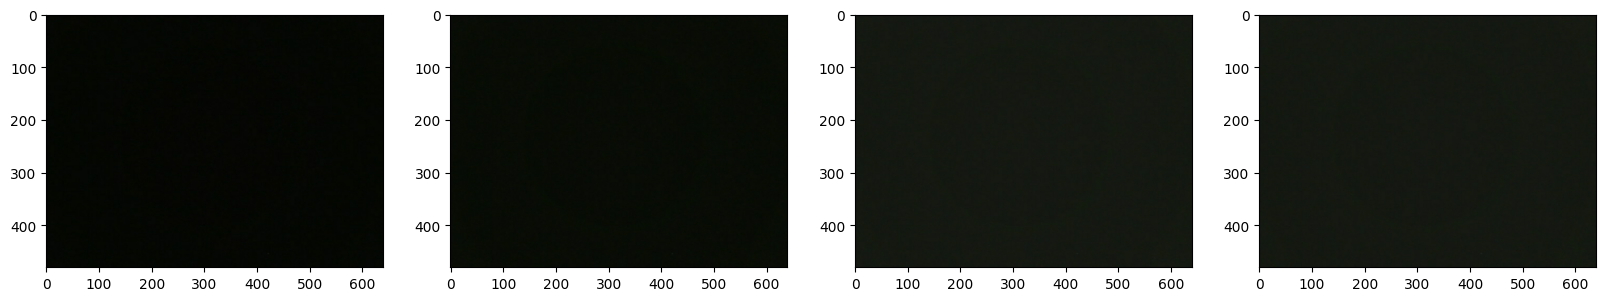

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [44]:
for folder in ['training','testing','validation']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)   

In [13]:
#setting a variable for image to check dimensions of pictures
image = cv2.imread(os.path.join('data', 'training', 'images', '4311f882-6ecf-11ed-a332-00155dc7c39b.jpg')) 

In [14]:
image.shape #checking dimensions of pictures

(480, 640, 3)

In [15]:
import albumentations as album #importing for random augmentations to raw images

In [16]:
#applying random augmentations
augmentor = album.Compose([album.RandomCrop(width=450, height=450), 
                         album.HorizontalFlip(p=0.5), 
                         album.RandomBrightnessContrast(p=0.2),
                         album.RandomGamma(p=0.2), 
                         album.RGBShift(p=0.2), 
                         album.VerticalFlip(p=0.5)], 
                       bbox_params=album.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [17]:
img = cv2.imread(os.path.join('data','training', 'images','4311f882-6ecf-11ed-a332-00155dc7c39b.jpg'))

In [18]:
img

array([[[155, 153, 152],
        [156, 154, 153],
        [157, 155, 154],
        ...,
        [ 63,  65,  66],
        [ 62,  64,  64],
        [ 69,  71,  71]],

       [[155, 153, 152],
        [155, 153, 152],
        [156, 154, 153],
        ...,
        [ 70,  72,  73],
        [ 66,  68,  68],
        [ 69,  71,  71]],

       [[154, 152, 151],
        [154, 152, 151],
        [155, 153, 152],
        ...,
        [ 78,  77,  79],
        [ 71,  73,  73],
        [ 70,  72,  72]],

       ...,

       [[143, 144, 140],
        [144, 145, 141],
        [144, 145, 141],
        ...,
        [101, 109, 108],
        [100, 108, 107],
        [ 98, 109, 107]],

       [[143, 144, 142],
        [144, 145, 143],
        [144, 145, 143],
        ...,
        [103, 109, 108],
        [103, 109, 108],
        [102, 110, 109]],

       [[143, 144, 142],
        [145, 146, 144],
        [145, 146, 144],
        ...,
        [101, 107, 106],
        [102, 108, 107],
        [104, 110, 109]]

In [19]:
with open(os.path.join('data', 'training', 'labels', '4311f882-6ecf-11ed-a332-00155dc7c39b.json'), 'r') as f:
    label = json.load(f)

In [20]:
label['shapes'][0]['points'] #fetching data inside the dictionary holding the labels

[[237.17948717948718, 203.07692307692307],
 [377.6923076923077, 393.84615384615387]]

In [21]:
coor = [0,0,0,0]
coor[0] = label['shapes'][0]['points'][0][0]
coor[1] = label['shapes'][0]['points'][0][1]
coor[2] = label['shapes'][0]['points'][1][0]
coor[3] = label['shapes'][0]['points'][1][1]

In [22]:
coor

[237.17948717948718, 203.07692307692307, 377.6923076923077, 393.84615384615387]

In [23]:
coor = list(np.divide(coor, [640,480,640,480]))

In [24]:
coor

[0.37059294871794873,
 0.4230769230769231,
 0.5901442307692307,
 0.8205128205128206]

In [25]:
augmented = augmentor(image=img, bboxes=[coor], class_labels=['face'])

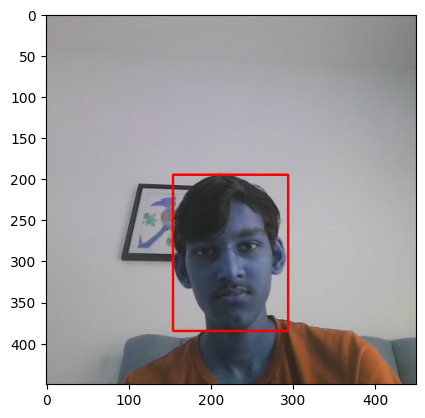

In [26]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [ ]:
for partition in ['training','testing','validation']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

            try: 
                for x in range(60):
                    augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                    cv2.imwrite(os.path.join('data_augment', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                    annotation = {}
                    annotation['image'] = image

                    if os.path.exists(label_path):
                        if len(augmented['bboxes']) == 0: 
                            annotation['bbox'] = [0,0,0,0]
                            annotation['class'] = 0 
                        else: 
                            annotation['bbox'] = augmented['bboxes'][0]
                            annotation['class'] = 1
                    else: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 


                    with open(os.path.join('data_augment', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                        json.dump(annotation, f)

            except Exception as e:
                print(e)

In [27]:
training_images = tf.data.Dataset.list_files('data_augment\\training\\images\\*.jpg', shuffle=False)
training_images = training_images.map(load_image)
training_images = training_images.map(lambda x: tf.image.resize(x, (120,120)))
training_images = training_images.map(lambda x: x/255)

In [28]:
testing_images = tf.data.Dataset.list_files('data_augment\\testing\\images\\*.jpg', shuffle=False)
testing_images = testing_images.map(load_image)
testing_images = testing_images.map(lambda x: tf.image.resize(x, (120,120)))
testing_images = testing_images.map(lambda x: x/255)

In [29]:
validation_images = tf.data.Dataset.list_files('data_augment\\validation\\images\\*.jpg', shuffle=False)
validation_images = validation_images.map(load_image)
validation_images = validation_images.map(lambda x: tf.image.resize(x, (120,120)))
validation_images = validation_images.map(lambda x: x/255)

In [30]:
training_images.as_numpy_iterator().next()

array([[[0.40790442, 0.3726103 , 0.3373162 ],
        [0.4117647 , 0.3764706 , 0.34117648],
        [0.41194853, 0.37665442, 0.3413603 ],
        ...,
        [0.42892158, 0.4014706 , 0.37009802],
        [0.42156863, 0.3985294 , 0.35882354],
        [0.42297795, 0.4023897 , 0.35588235]],

       [[0.40392157, 0.37696078, 0.3367647 ],
        [0.406924  , 0.37996325, 0.33976716],
        [0.41127452, 0.38431373, 0.34411764],
        ...,
        [0.4117647 , 0.39607844, 0.35980392],
        [0.4117647 , 0.39950982, 0.36421567],
        [0.41305146, 0.40128675, 0.35637254]],

       [[0.4       , 0.3764706 , 0.32941177],
        [0.3995711 , 0.37604168, 0.32898283],
        [0.40294117, 0.37941176, 0.33235294],
        ...,
        [0.40833333, 0.39264706, 0.3495098 ],
        [0.40735295, 0.39607844, 0.35931373],
        [0.4019608 , 0.4019608 , 0.35784313]],

       ...,

       [[0.0372549 , 0.10098039, 0.21911764],
        [0.02408088, 0.08180147, 0.19546568],
        [0.04178922, 0

In [31]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [35]:
training_labels = tf.data.Dataset.list_files('data_augment\\training\\labels\\*.json', shuffle=False)
training_labels = training_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [36]:
testing_labels = tf.data.Dataset.list_files('data_augment\\testing\\labels\\*.json', shuffle=False)
testing_labels = testing_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [39]:
validation_labels = tf.data.Dataset.list_files('data_augment\\validation\\labels\\*.json', shuffle=False)
validation_labels = validation_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [40]:
training = tf.data.Dataset.zip((training_images, training_labels))
training = training.shuffle(5000)
training = training.batch(8)
training = training.prefetch(4)

In [43]:
testing = tf.data.Dataset.zip((testing_images, testing_labels))
testing = testing.shuffle(1300)
testing = testing.batch(8)
testing = testing.prefetch(4)

In [45]:
validation = tf.data.Dataset.zip((validation_images, validation_labels))
validation = validation.shuffle(1000)
validation = validation.batch(8)
validation = validation.prefetch(4)

In [46]:
training.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.527   , 0.4468  , 0.8394  , 0.8706  ],
        [0.408   , 0.618   , 0.597   , 0.8555  ],
        [0.      , 0.      , 0.0849  , 0.2612  ],
        [0.      , 0.      , 0.      , 0.      ],
        [0.3499  , 0.6396  , 0.757   , 1.      ],
        [0.1704  , 0.1577  , 0.346   , 0.373   ],
        [0.      , 0.1882  , 0.0775  , 0.674   ],
        [0.003248, 0.6416  , 0.4102  , 1.      ]], dtype=float16))

In [56]:
data_samples = training.as_numpy_iterator()

In [57]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


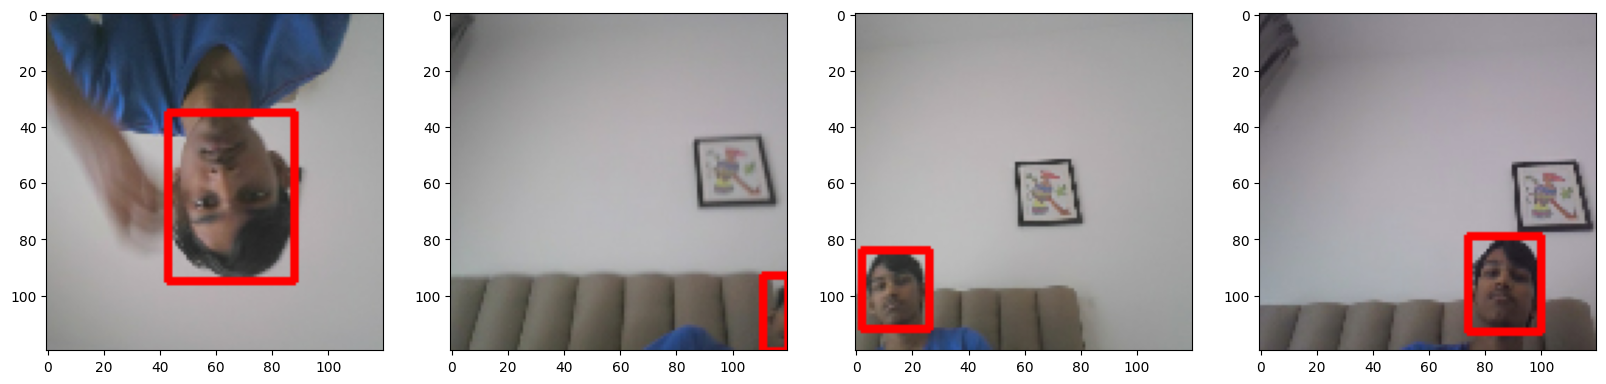

In [58]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [59]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [60]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 15s 0us/step


In [61]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [62]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    tracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return tracker

In [64]:
tracker = build_model()

In [66]:
tracker.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_4[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d_2 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                              

In [69]:
x, y = training.as_numpy_iterator().next()

In [73]:
classes, coor = facetracker.predict(x)

1/1 [==============================] - 1s 1s/step


In [74]:
classes, coor

(array([[0.66058564],
        [0.5875163 ],
        [0.6437223 ],
        [0.7204131 ],
        [0.6269602 ],
        [0.699814  ],
        [0.65169066],
        [0.6483921 ]], dtype=float32),
 array([[0.43390858, 0.63676316, 0.5229533 , 0.3306258 ],
        [0.37048802, 0.66819775, 0.48651952, 0.3311787 ],
        [0.32066947, 0.5819983 , 0.510614  , 0.3518054 ],
        [0.37258866, 0.6466056 , 0.6184891 , 0.41540718],
        [0.31075728, 0.6321353 , 0.5725614 , 0.39345598],
        [0.36645997, 0.62958616, 0.5472845 , 0.37444344],
        [0.28844523, 0.61288863, 0.53883624, 0.34176502],
        [0.37170154, 0.7027169 , 0.50434625, 0.42294297]], dtype=float32))

In [75]:
batches_per_epoch = len(training)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [76]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [78]:
def local_loss(y_true, yunit):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yunit[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yunit[:,3] - yunit[:,1] 
    w_pred = yunit[:,2] - yunit[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [79]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = local_loss

In [81]:
localization_loss(y[1], coor)

<tf.Tensor: shape=(), dtype=float32, numpy=5.008235>